In [1]:
import sys
import os
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Setup Library Path ---
# This is the specific, hard-coded path for your system.
project_path = r"D:\GITHUB"

In [3]:
# Add this path to the list of places Python looks for libraries
if project_path not in sys.path:
    sys.path.insert(0, project_path)

{'student_id': 'Categorical', 'test_score': 'Numerical', 'grade_level': 'Categorical', 'zip_code': 'Categorical', 'feedback_comments': 'Categorical'}

> Plotting for 'student_id' (Type: Categorical)


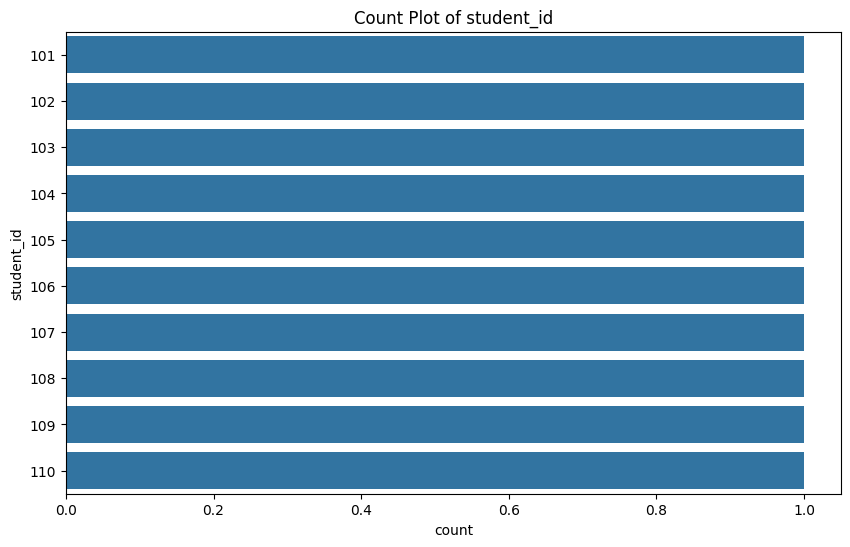


> Plotting for 'test_score' (Type: Categorical)


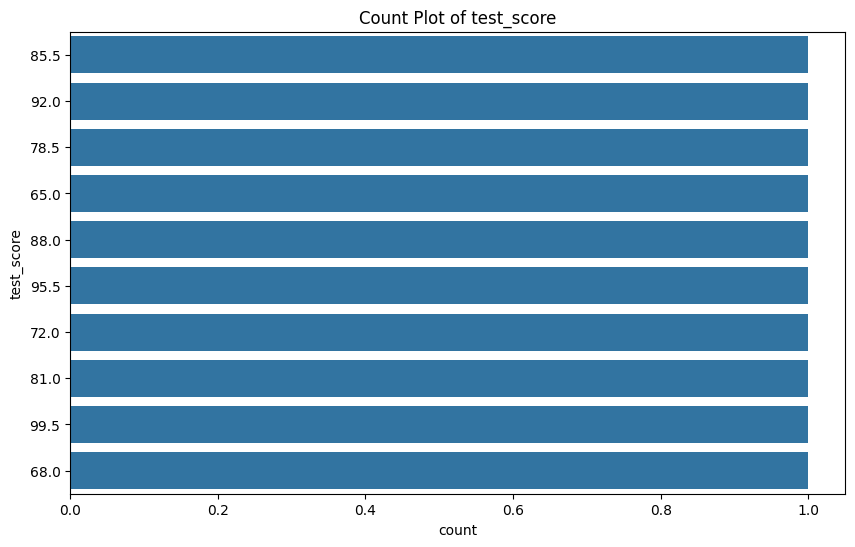


> Plotting for 'grade_level' (Type: Categorical)


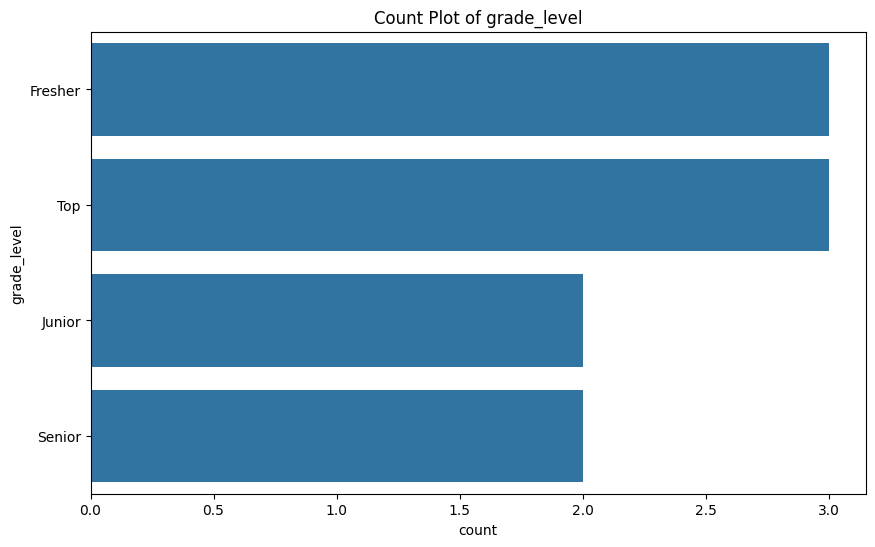


> Plotting for 'zip_code' (Type: Categorical)


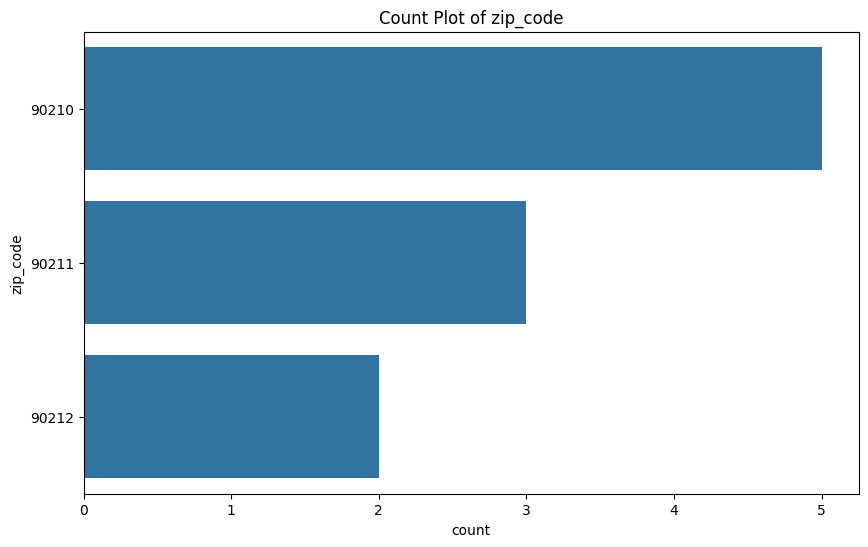


> Plotting for 'feedback_comments' (Type: Text)


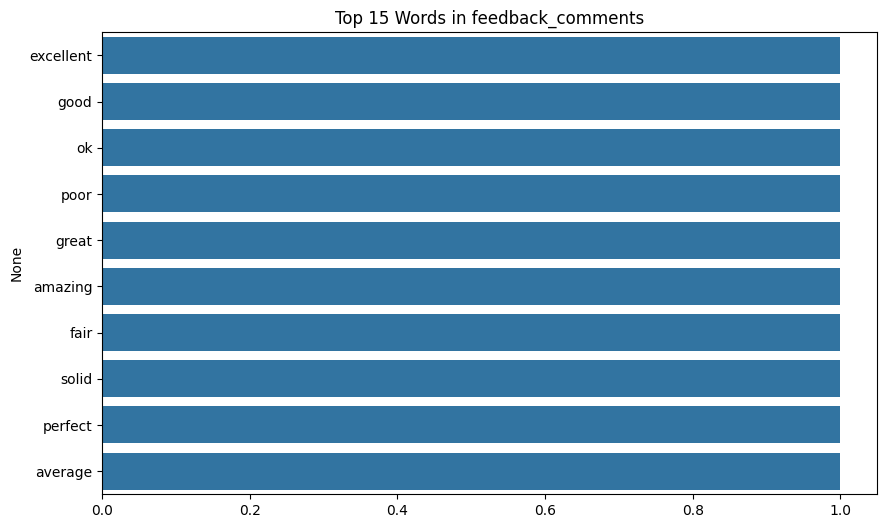

--- Original Text Data ---
0    This is the FIRST sentence, uh, with lots of s...
1    And here is another one... like, um, just for ...
2     Finally, a third sentence. It's GREAT, isn't it?
dtype: object

--- Cleaned Text Data ---
0        first sentence lots stopwords
1                  another one testing
2    finally third sentence great isnt
dtype: object
ds_helper library loaded successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aloka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aloka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# --- 2. Import Your Functions ---
# This will now work because Python can find the 'ds_helper' package
# inside the 'D:\GITHUB' folder.
from ds_helper import auto_visualize, detect_column_types, clean_text

In [5]:
print(f"Successfully added {project_path} to path and imported ds_helper functions.")

# --- 3. Connect to Database ---
# (Rest of your notebook code follows...)

Successfully added D:\GITHUB to path and imported ds_helper functions.


In [6]:
# --- 2. Connect to Database ---
# !!! REPLACE 'YOUR_PASSWORD' WITH YOUR REAL PASSWORD !!!
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Alok@2004", 
        database="retail_db"
    )
    print("✅ Database connection successful!")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    print("❌ Please check your password and ensure MySQL is running.")

✅ Database connection successful!


C:\Users\aloka\AppData\Local\Temp\ipykernel_21424\3351587935.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql_query(query_category, conn)



--- Total Sales Revenue by Category ---


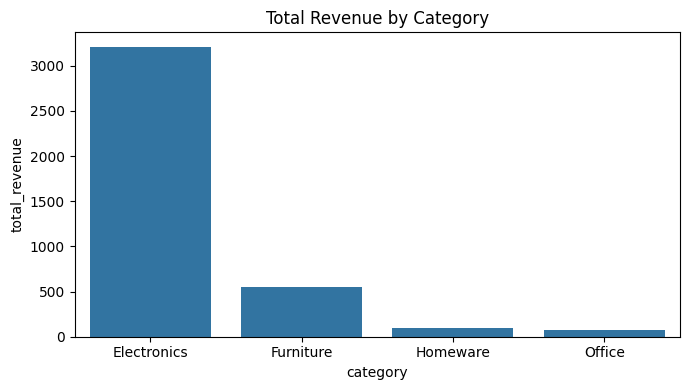


    Observation: This bar chart shows that 'Electronics' is the dominant category, 
    driving the vast majority of sales revenue. 'Furniture' is a distant second, 
    while 'Homeware' and 'Office' are very low-performing.
    
    Recommendation: This insight suggests the business should focus its marketing 
    budget and inventory on high-value electronics.
    

--- Average Purchase Value by Customer ---


C:\Users\aloka\AppData\Local\Temp\ipykernel_21424\3351587935.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer = pd.read_sql_query(query_customer, conn)


<Figure size 640x480 with 0 Axes>

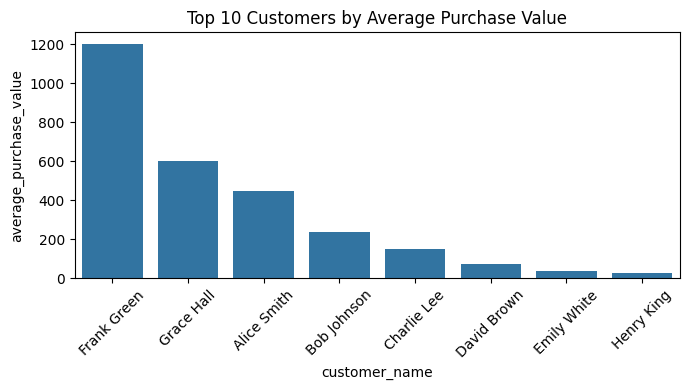


    Observation: This chart identifies our high-value customers. Customers like 
    'Frank Green' and 'Alice Smith' have the highest average purchase value, 
    as they buy expensive items like laptops.
    
    Recommendation: We should target these high-spending customers with a loyalty 
    program or special offers to encourage repeat business.
    

--- Daily Sales Revenue Trend ---


C:\Users\aloka\AppData\Local\Temp\ipykernel_21424\3351587935.py:81: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trends = pd.read_sql_query(query_trends, conn)


<Figure size 640x480 with 0 Axes>

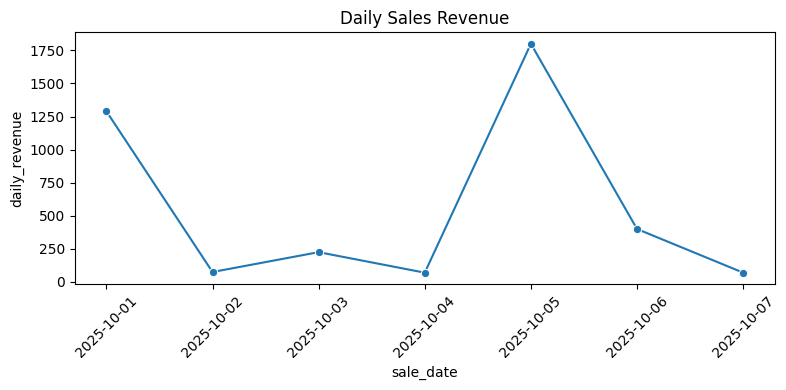


    Observation: This line plot tracks daily revenue, showing that sales are 
    inconsistent. The revenue spiked significantly on days when high-value 
    electronics were sold.
    
    Recommendation: This shows our daily income is volatile and depends on 
    big-ticket items. The business should explore strategies to increase 
    smaller, more consistent sales to create a more stable daily revenue.
    

✅ Database connection closed. All analysis complete.


<Figure size 640x480 with 0 Axes>

In [7]:
# --- 3. Run Analysis & Visualize ---
if 'conn' in locals() and conn.is_connected():
    
    # --- Query 1: Total Sales per Category ---
    query_category = """
    SELECT
        p.category,
        SUM(s.quantity * p.price) AS total_revenue
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY p.category
    ORDER BY total_revenue DESC;
    """
    df_category = pd.read_sql_query(query_category, conn)
    
    print("\n--- Total Sales Revenue by Category ---")
    plt.figure(figsize=(7, 4))
    sns.barplot(data=df_category, x='category', y='total_revenue')
    plt.title('Total Revenue by Category')
    plt.tight_layout()
    plt.show()
    plt.savefig("category_chart.png", bbox_inches='tight')
    
    # --- Observation 1 ---
    print(
    """
    Observation: This bar chart shows that 'Electronics' is the dominant category, 
    driving the vast majority of sales revenue. 'Furniture' is a distant second, 
    while 'Homeware' and 'Office' are very low-performing.
    
    Recommendation: This insight suggests the business should focus its marketing 
    budget and inventory on high-value electronics.
    """
    )

    
    # --- Query 2: Average Purchase per Customer ---
    query_customer = """
    SELECT
        c.customer_name,
        AVG(s.quantity * p.price) AS average_purchase_value
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    JOIN Customers c ON s.customer_id = c.customer_id
    GROUP BY c.customer_name
    ORDER BY average_purchase_value DESC;
    """
    df_customer = pd.read_sql_query(query_customer, conn)
    
    print("\n--- Average Purchase Value by Customer ---")
    plt.figure(figsize=(7, 4))
    sns.barplot(data=df_customer.head(10), x='customer_name', y='average_purchase_value')
    plt.title('Top 10 Customers by Average Purchase Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig("category_chart.png", bbox_inches='tight')

    # --- Observation 2 ---
    print(
    """
    Observation: This chart identifies our high-value customers. Customers like 
    'Frank Green' and 'Alice Smith' have the highest average purchase value, 
    as they buy expensive items like laptops.
    
    Recommendation: We should target these high-spending customers with a loyalty 
    program or special offers to encourage repeat business.
    """
    )
    
    # --- Query 3: Daily Sales Trends ---
    query_trends = """
    SELECT
        s.sale_date,
        SUM(s.quantity * p.price) AS daily_revenue
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY s.sale_date
    ORDER BY s.sale_date;
    """
    df_trends = pd.read_sql_query(query_trends, conn)
    
    print("\n--- Daily Sales Revenue Trend ---")
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_trends, x='sale_date', y='daily_revenue', marker='o')
    plt.title('Daily Sales Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig("category_chart.png", bbox_inches='tight')

    # --- Observation 3 ---
    print(
    """
    Observation: This line plot tracks daily revenue, showing that sales are 
    inconsistent. The revenue spiked significantly on days when high-value 
    electronics were sold.
    
    Recommendation: This shows our daily income is volatile and depends on 
    big-ticket items. The business should explore strategies to increase 
    smaller, more consistent sales to create a more stable daily revenue.
    """
    )
    
    # --- Close the connection when done ---
    conn.close()
    print("\n✅ Database connection closed. All analysis complete.")
    
else:
    print("\n❌ Could not run analysis. Database connection failed.")